In [95]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from matplotlib import pyplot as plt


In [96]:
train_data = datasets.FashionMNIST(root='.', download=True, train=True, transform=transforms.ToTensor())
valid_data = datasets.FashionMNIST(root='.', download=True, train=False, transform=transforms.ToTensor())

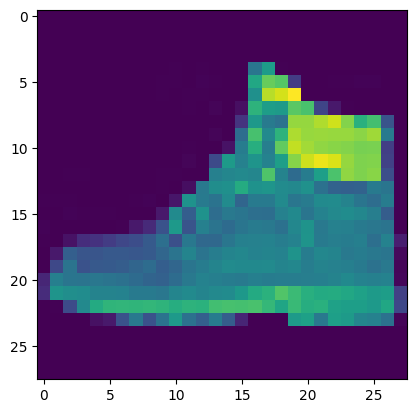

In [97]:
plt.imshow(train_data[90][0].view(28, 28, -1))

In [98]:
# for RGB images we should calculate mean and std for each channel
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
all_num_pixcels_train = len(train_data) * 28 * 28

total_sum_train = 0

for batch in train_loader:
    total_sum_train += batch[0].sum()

train_mean = total_sum_train / all_num_pixcels_train

sum_of_squared_errot_train = 0

for batch in train_loader:
    sum_of_squared_errot_train += ((batch[0] - train_mean).pow(2)).sum()

train_std = torch.sqrt(sum_of_squared_errot_train / all_num_pixcels_train)

train_mean, train_std

(tensor(0.2860), tensor(0.3530))

In [99]:
valid_loader = DataLoader(dataset=valid_data, batch_size=32, shuffle=True)
all_num_pixcels_valid = len(valid_data) * 28 * 28

total_sum_valid = 0

for batch in valid_loader:
    total_sum_valid += batch[0].sum()

valid_mean = total_sum_valid / all_num_pixcels_valid

sum_of_squared_errot_valid = 0

for batch in valid_loader:
    sum_of_squared_errot_valid += ((batch[0] - valid_mean).pow(2)).sum()

valid_std = torch.sqrt(sum_of_squared_errot_valid / all_num_pixcels_valid)

valid_mean, valid_std

(tensor(0.2868), tensor(0.3524))

In [100]:
train_transform = transforms.Compose([transforms.Resize((256, 256)),
                                    transforms.RandomCrop(size=(224, 224)),
                                    transforms.RandomRotation(degrees=30),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=train_mean, std=train_std)
                                    ])

In [101]:
valid_transform = transforms.Compose([transforms.Resize((256, 256)),
                                     transforms.CenterCrop(size=(224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=valid_mean, std=valid_std)
                                    ])

In [102]:
train_data_augmented = datasets.FashionMNIST(root='.', download=True, train=True, transform=train_transform)
valid_data_augmented = datasets.FashionMNIST(root='.', download=True, train=False, transform=valid_transform)

In [103]:
train_data_augmented_loder = DataLoader(dataset=train_data_augmented, batch_size=32, shuffle=True)
valid_data_augmented_loder = DataLoader(dataset=valid_data_augmented, batch_size=32, shuffle=True)

In [104]:
model = models.resnet18(pretrained=True)

e:\pytorch-course\torchenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\pytorch-course\torchenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [105]:
conv1_weights = model.conv1.weight
conv1_weights.shape

torch.Size([64, 3, 7, 7])

In [106]:
model.conv1.weight = torch.nn.Parameter(conv1_weights.sum(dim=1, keepdim=True))
model.conv1.weight.shape

torch.Size([64, 1, 7, 7])

In [107]:
model.conv1.in_channels = 1

In [108]:
for param in model.parameters():
    param.requires_grad = False

In [109]:
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [110]:
fc_in_features = model.fc.in_features

In [111]:
model.fc = nn.Linear(in_features=fc_in_features, out_features=10)

In [112]:
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [113]:
device = torch.device('cuda:0') if torch.cuda.is_available() else 'cpu'
device

device(type='cuda', index=0)

In [114]:
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [115]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [116]:
epochs = 10
num_valid_data = len(valid_data)

In [117]:
for epoch in range(0, epochs):
    model.train()
   
    if epoch % 2 == 0:
        chechpoint = {
            'model_state' : model.state_dict(),
            'optimizer_state' : optimizer.state_dict(),
            'epoch' : epoch
        }
        torch.save(chechpoint, 'chckpnt.pth')

    for x, y in train_data_augmented_loder:
        x = x.to(device)
        y = y.to(device)

        yhat = model(x)
        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0

    for x_val, y_val in valid_data_augmented_loder:
        x_val = x_val.to(device)
        y_val = y_val.to(device)
    
        yhat_val = model(x_val)
        _, label = torch.max(yhat_val, 1)
        correct += (label==y_val).sum()

    valid_acc = correct / num_valid_data
    
    print(f'validation accuracy epoch{epoch}: {valid_acc}')
        

validation accuracy epoch0: 0.7910999655723572
validation accuracy epoch1: 0.7756999731063843
validation accuracy epoch2: 0.8039999604225159
validation accuracy epoch3: 0.8100999593734741
validation accuracy epoch4: 0.7953999638557434
validation accuracy epoch5: 0.8082000017166138
validation accuracy epoch6: 0.8169999718666077
validation accuracy epoch7: 0.7989000082015991
validation accuracy epoch8: 0.7910000085830688
validation accuracy epoch9: 0.8096999526023865
